In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!unzip -q "/content/breast.zip"

In [ ]:
pip install scikit-learn==0.19.1 

In [ ]:
import numpy as np # linear algebra
import cv2

import os
import random
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, 
    Dense, Dropout, 
    Flatten)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(os.listdir("/content/gdrive/My Drive/bb/breast"))

['cancer', 'normal']


In [ ]:
IMG_SIZE = 128

In [ ]:
CATEGORIES = ['cancer', 'normal']
dataset = []

def generate_data():
    for category in CATEGORIES:
        path = f'/content/gdrive/My Drive/bb/breast/{category}'
        class_id = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
                image_array = cv2.resize(image_array, (IMG_SIZE , IMG_SIZE))
                dataset.append([image_array, class_id])
            except Exception as e:
                print(e)
    random.shuffle(dataset)
                
generate_data()

In [ ]:
print(len(dataset))

178


In [ ]:
data = []
labels = []
for features, label in dataset:
    data.append(features)
    labels.append(label)

In [ ]:
data = np.array(data)
data.reshape(-1, 128, 128, 3)

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [ ]:
pickle.dump(data, open("data.pickle", "wb"))

pickle.dump(labels, open("labels.pickle", "wb"))

In [ ]:
data = pickle.load(open("data.pickle", "rb"))

labels = pickle.load(open("labels.pickle", "rb"))

In [ ]:
train_data, data, train_labels, labels = train_test_split(data, labels,test_size=0.15)

test_data, validation_data, test_labels, validation_labels = train_test_split(data, labels,test_size=0.7)

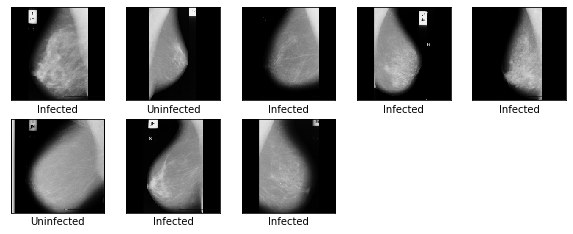

In [ ]:
plt.figure(figsize=(10, 10))
i = 0
for i in range(len(test_data)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i])
    if(test_labels[i] == 0):
        plt.xlabel('Infected')
    else:
        plt.xlabel('Uninfected')
    i += 1
plt.show()

In [ ]:
datagen_train = ImageDataGenerator(rescale=1./255,
                            rotation_range=45,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

datagen_test = ImageDataGenerator(rescale=1./255)
datagen_validation = ImageDataGenerator(rescale=1./255)

In [ ]:
datagen_train.fit(train_data)
datagen_test.fit(test_data)
datagen_test.fit(validation_data)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation="relu"),
    Dense(2, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
epochs = 30
history = model.fit_generator(datagen_train.flow(train_data, train_labels, batch_size=BATCH_SIZE),
                   steps_per_epoch=8000 / BATCH_SIZE,
                   epochs=epochs,
                   validation_data=datagen_validation.flow(validation_data, 
                                                     validation_labels, batch_size=BATCH_SIZE),
                    
                   )

Epoch 1/30
250/250 [==============================] - 273s 1s/step - loss: 0.6899 - acc: 0.5368 - val_loss: 0.6644 - val_acc: 0.7368
Epoch 2/30
250/250 [==============================] - 269s 1s/step - loss: 0.6643 - acc: 0.5869 - val_loss: 0.6793 - val_acc: 0.5263
Epoch 3/30
250/250 [==============================] - 268s 1s/step - loss: 0.6482 - acc: 0.6102 - val_loss: 0.6510 - val_acc: 0.5263
Epoch 4/30
250/250 [==============================] - 269s 1s/step - loss: 0.6276 - acc: 0.6326 - val_loss: 0.6180 - val_acc: 0.6842
Epoch 5/30
250/250 [==============================] - 269s 1s/step - loss: 0.6215 - acc: 0.6419 - val_loss: 0.6659 - val_acc: 0.5789
Epoch 6/30
250/250 [==============================] - 270s 1s/step - loss: 0.5945 - acc: 0.6689 - val_loss: 0.7196 - val_acc: 0.5789
Epoch 7/30
250/250 [==============================] - 272s 1s/step - loss: 0.5807 - acc: 0.6748 - val_loss: 0.7032 - val_acc: 0.5789
Epoch 8/30
250/250 [==============================] - 272s 1s/step - 

In [ ]:
accuracy = history.history['acc']
loss = history.history['loss']
val_accuracy = history.history['val_acc']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.7040964365005493
Training Loss: 0.5578811897537447
Validation Accuracy: 0.5
Validation Loss: 0.763062059879303


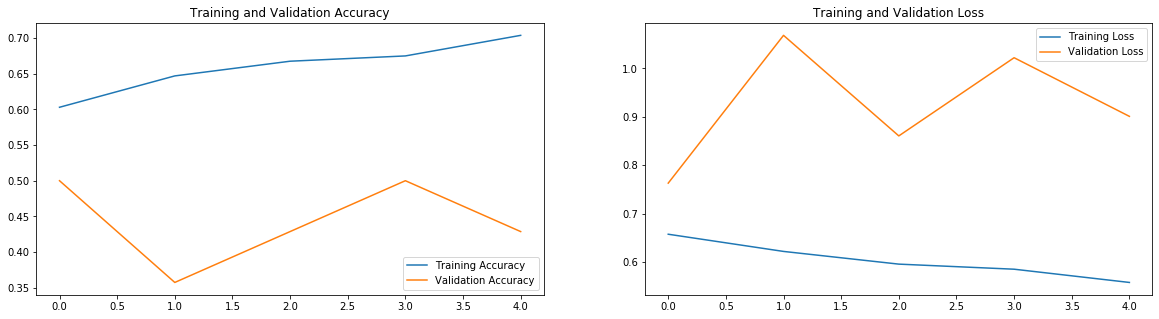

In [ ]:
epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
class_names = ['cancer', 'normal']
def plot_images(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]))

In [ ]:
random.shuffle(test_data)
predictions = model.predict(test_data)

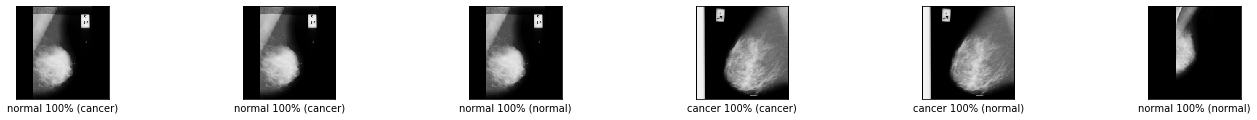

In [ ]:
num_rows = 8
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(test_data)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_images(i, predictions, test_labels, test_data)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import metrics
from keras import backend as K
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


y_pred = model.predict(test_data, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(y_pred_bool)

print(classification_report(test_labels, y_pred_bool))
print('F1_score : ',f1_score(test_labels,y_pred_bool))
print('sensitibity : ',metrics.recall_score(test_labels, y_pred_bool))




6/6 [==============================] - 0s 12ms/sample
[1 1 1 0 0 1]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

F1_score :  0.5714285714285715
sensitibity :  0.6666666666666666


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_labels, y_pred_bool)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

[[1 2]
 [1 2]]


In [ ]:
from keras import metrics
print('F1_score = ',f1_score(test_labels,y_pred_bool))
print('specificity =',TN/(TN+FP))
print('sensitivity =',TP/(TP+FN))


F1_score =  0.5714285714285715
specificity = 0.3333333333333333
sensitivity = 0.6666666666666666


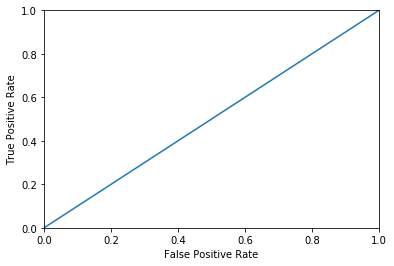

0.5
0.0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_labels,y_pred_bool)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_labels,y_pred_bool) 
print(auc_score) 
print(matthews_corrcoef(test_labels,y_pred_bool))

In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 